## Análise de Sentimentos em Dados do Twitter sobre o Governo de Minas.

### Importando libs  e funções

In [0]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

### Etapa de exploração e tratamento dos dados

Importanto os dados.
Fonte: https://github.com/minerandodados/mdrepo


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/intelligentagents/aprendizagem-supervisionada/master/data/tweets.csv', encoding ='utf-8')

In [12]:
df.head(5)

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo


In [13]:
df.describe()

,Unnamed: 0,Geo Coordinates.latitude,Geo Coordinates.longitude,Retweet Count
count,8198.000000,104.000000,104.000000,8198.000000
mean,4098.751403,-42.964716,-19.530204,43.343498
std,2367.029095,1.399314,1.037815,123.376115
min,0.000000,-46.643035,-23.493237,0.000000
25%,2049.250000,-43.941907,-19.914265,0.000000
50%,4098.500000,-41.971876,-18.879871,0.000000
75%,6148.750000,-41.943662,-18.859150,11.000000
max,8198.000000,-41.560230,-18.568089,1940.000000


Visualizando o dataset:

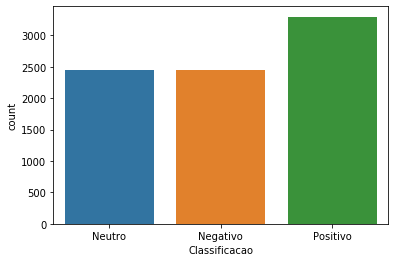

In [14]:
sns.countplot(x= 'Classificacao',data = df)

Processo de tratamento do texto:

![Image](https://drive.google.com/open?id=1jPjuzOCJAASIUgRPHwFnnF0e7eoeXJIB)

Definição das váriaveis dependentes e indepentes: Tweets e classificação do sentimento da mensagem:

In [0]:
X = df['Text'].values
y = df['Classificacao'].values

Criação de um vetor que irá calcular a frequencia de todas as palavras 


In [0]:
vectorizer = CountVectorizer(ngram_range=(1,2))

Converter o texto em uma matriz de contagens de tokens


In [0]:
freq_tweets = vectorizer.fit_transform(X)

### Etapa de treinamento e avaliação do modelo

Dividindo os dados:

In [0]:
X_train, X_test, y_train, y_test = train_test_split(freq_tweets, y, test_size=0.20, random_state=42)

Treinando o algoritmo Naive Bayes:

In [21]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

ANalisando a acuração do modelo com a validação cruzada usando 10 folds:

In [0]:
results = cross_val_predict(model, X_test, y_test, cv=10)

In [23]:
metrics.accuracy_score(y_test, results)

0.9359756097560976

ANalisando os resultados de todas as classes:

In [24]:
print(metrics.classification_report(y_test,results,['Positivo','Negativo','Neutro']))

              precision    recall  f1-score   support

    Positivo       0.95      0.96      0.96       665
    Negativo       0.94      0.95      0.94       468
      Neutro       0.92      0.89      0.90       507

    accuracy                           0.94      1640
   macro avg       0.93      0.93      0.93      1640
weighted avg       0.94      0.94      0.94      1640

